In [100]:
import pandas as pd
import numpy as np

In [101]:
# read the data, nrows is how many rows you wants to load - because there're too many!
data = pd.read_csv('usa_00014.csv.gz', nrows=4000000, compression='gzip')

In [102]:
# we clean missing data, and those whose wages is too low
df = data[(data['YEAR']==2010)&(data['AGE']>=18)&(data['AGE']<=65)&(data['INCWAGE']>=65)&(data['INCWAGE'] < 999997)]

In [103]:
data = pd.read_csv('usa_00013.csv.gz', nrows=4000000, compression='gzip')
df_1990 = data[(data['YEAR']==1990)&(data['AGE']>=18)&(data['AGE']<=65)&(data['INCWAGE']>=65)&(data['INCWAGE'] < 999997)]

In [104]:
data = pd.read_csv('usa_00017.csv.gz', nrows=4000000, compression='gzip')
df_2000 = data[(data['YEAR']==2000)&(data['AGE']>=18)&(data['AGE']<=65)&(data['INCWAGE']>=65)&(data['INCWAGE'] < 999997)]

(conditioned on ages larger than 30)
1. College Education or not (policy variable), Y_d incoming wage (conditioned) in 1990s, 2000 and 2010. -> 3 tabular data
2. College Education or not (policy variable), Y_d incoming wage (conditioned) in men, women, (one with least wage income for each household) -> 2 tabular data
3. College Education or not (policy variable), Y_d incoming wage (conditioned) in people of ages 40s, 50s, 60s -> 3 tabular data

In [105]:
df.INCWAGE = np.log(df.INCWAGE)
df_1990.INCWAGE = np.log(df_1990.INCWAGE)
df_2000.INCWAGE = np.log(df_2000.INCWAGE)

C:\Users\liuhn\AppData\Local\Temp/ipykernel_6584/1243760830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000.INCWAGE = np.log(df_2000.INCWAGE)


In [106]:
df = df[df['AGE'] >= 30]
df.EDUC.value_counts() / df.shape[0]

6     0.335625
10    0.211874
7     0.148971
11    0.140869
8     0.094485
2     0.019135
5     0.014638
4     0.012301
3     0.010044
0     0.007710
1     0.004349
Name: EDUC, dtype: float64

In [107]:
df_1990 = df_1990[df_1990['AGE'] >= 30]
df_1990.EDUC.value_counts() / df_1990.shape[0]

6     0.302244
7     0.223042
10    0.159765
11    0.098611
8     0.082164
2     0.041284
4     0.027152
5     0.026214
3     0.019506
1     0.010774
0     0.009245
Name: EDUC, dtype: float64

In [108]:
df_2000 = df_2000[df_2000['AGE'] >= 30]
df_2000.EDUC.value_counts() / df_2000.shape[0]

6     0.377440
10    0.193965
7     0.150147
11    0.121933
8     0.080621
2     0.020543
5     0.018117
4     0.016981
3     0.011860
0     0.004597
1     0.003795
Name: EDUC, dtype: float64

In [109]:
filt_2010 = df[(df['EDUC'] == 6)|(df['EDUC'] == 10)]#['INCWAGE'].hist()
filt_2010

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,HHTYPE,CLUSTER,STATEFIP,STRATA,GQ,...,AGE,MARST,RACE,RACED,HCOVANY,EDUC,EDUCD,SCHLTYPE,INCWAGE,TRANTIME
5,2010,201001,4,224,82.0,1,2010000000041,1,130001,1,...,33,1,1,100,2,10,101,1,10.239960,60
22,2010,201001,11,704,169.0,1,2010000000111,1,60001,1,...,46,1,1,100,2,6,63,1,10.858999,30
23,2010,201001,11,704,169.0,1,2010000000111,1,60001,1,...,44,1,1,100,2,6,63,1,10.257659,30
34,2010,201001,16,900,352.0,1,2010000000161,1,80001,1,...,38,1,1,100,2,6,64,1,10.819778,20
37,2010,201001,17,901,106.0,1,2010000000171,1,60001,1,...,56,1,1,100,2,6,63,1,10.373491,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061679,2010,201001,1397783,1412991,195.0,1,2010013977831,56,30056,1,...,49,1,1,100,2,6,63,1,11.002100,0
3061683,2010,201001,1397786,1413605,64.0,1,2010013977861,56,20056,1,...,57,1,1,100,2,6,63,1,10.596635,12
3061684,2010,201001,1397786,1413605,64.0,1,2010013977861,56,20056,1,...,50,1,1,100,2,6,64,1,10.463103,15
3061690,2010,201001,1397789,1414268,101.0,9,2010013977891,56,30056,1,...,55,4,1,100,1,6,63,1,9.104980,10


In [110]:
filt_2000 = df_2000[(df_2000['EDUC'] == 6)|(df_2000['EDUC'] == 10)]#['INCWAGE'].hist()
filt_2000

,YEAR,SAMPLE,SERIAL,HHWT,HHTYPE,CLUSTER,STATEFIP,STRATA,GQ,PERNUM,...,SEX,AGE,MARST,RACE,RACED,EDUC,EDUCD,SCHLTYPE,INCWAGE,TRANTIME
2,2000,200004,2,600.0,1,2000000000024,48,48,1,1,...,1,51,1,1,100,6,62,1,10.896739,150
3,2000,200004,2,600.0,1,2000000000024,48,48,1,2,...,2,48,1,1,100,6,62,1,6.802395,0
6,2000,200004,3,600.0,4,2000000000034,13,13,1,1,...,1,47,4,1,100,6,62,1,8.987197,0
7,2000,200004,4,600.0,4,2000000000044,12,12,1,1,...,1,53,3,1,100,6,62,1,8.716044,0
8,2000,200004,5,600.0,1,2000000000054,12,12,1,1,...,1,42,1,1,100,10,101,1,7.937375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371603,2000,200004,157981,600.0,1,2000001579814,26,26,1,2,...,1,31,1,1,100,10,101,1,10.373491,20
371609,2000,200004,157983,600.0,4,2000001579834,55,55,1,1,...,1,37,4,1,100,6,62,1,10.239960,0
371613,2000,200004,157985,600.0,1,2000001579854,12,12,1,2,...,2,36,1,1,100,6,62,1,6.551080,15
371615,2000,200004,157986,600.0,1,2000001579864,6,6,1,1,...,1,42,1,1,100,6,62,1,10.596635,60


In [111]:
filt_1990 = df_1990[(df_1990['EDUC'] == 6)|(df_1990['EDUC'] == 10)]#['INCWAGE'].hist()
filt_1990

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STATEFIP,STRATA,GQ,PERNUM,PERWT,SEX,AGE,RACE,RACED,EDUC,EDUCD,SCHLTYPE,INCWAGE
0,1990,199001,1,26.0,1990000000011,2,48,1,1,12.0,1,37,1,100,6,62,1,9.648595
10,1990,199001,5,11.0,1990000000051,2,52,1,1,11.0,1,54,1,100,6,62,1,11.277203
13,1990,199001,6,11.0,1990000000061,2,48,1,2,11.0,2,35,1,100,6,62,1,9.798127
16,1990,199001,7,12.0,1990000000071,2,48,1,1,12.0,1,50,1,100,10,101,1,10.583017
19,1990,199001,9,8.0,1990000000091,2,60,1,1,8.0,1,39,1,100,6,62,1,11.082143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999932,1990,199001,1757998,18.0,1990017579981,17,52,1,2,21.0,2,47,1,100,6,62,1,8.784622
3999953,1990,199001,1758005,12.0,1990017580051,17,52,1,2,15.0,2,31,1,100,10,101,1,10.126631
3999954,1990,199001,1758006,30.0,1990017580061,17,48,1,1,15.0,1,32,1,100,6,62,1,10.915088
3999957,1990,199001,1758007,48.0,1990017580071,17,48,1,1,24.0,1,32,1,100,6,62,1,10.596635


[Text(1, 0, '1990'), Text(2, 0, '2000'), Text(3, 0, '2010')]

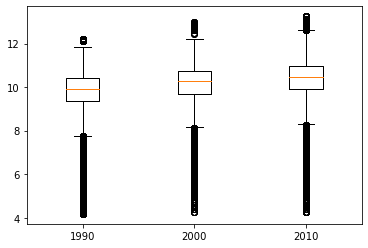

In [112]:
my_dict = {'1990': filt_1990.INCWAGE, '2000': filt_2000.INCWAGE, '2010': filt_2010.INCWAGE}

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

In [113]:
filt_2000.EDUC = 1*(filt_2000.EDUC == 10)
filt_1990.EDUC = 1*(filt_1990.EDUC == 10)
filt_2010.EDUC = 1*(filt_2010.EDUC == 10)

C:\Users\liuhn\AppData\Local\Temp/ipykernel_6584/657695122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_2000.EDUC = 1*(filt_2000.EDUC == 10)
C:\Users\liuhn\AppData\Local\Temp/ipykernel_6584/657695122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_1990.EDUC = 1*(filt_1990.EDUC == 10)
C:\Users\liuhn\AppData\Local\Temp/ipykernel_6584/657695122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [114]:
filt_2000 = filt_2000.get(["AGE", "SEX", "RACE", "STATEFIP", "EDUC", "INCWAGE"])
# encode Race
one_hot = pd.get_dummies(filt_2000.RACE)
filt_2000 = filt_2000.drop('RACE',axis = 1)
filt_2000 = filt_2000.join(one_hot)

# encode SEX
one_hot.SEX = filt_2000.SEX - 1

# encode State
one_hot = pd.get_dummies(filt_2000.STATEFIP)
filt_2000 = filt_2000.drop('STATEFIP',axis = 1)
filt_2000 = filt_2000.join(one_hot, rsuffix='_state')

C:\Users\liuhn\AppData\Local\Temp/ipykernel_6584/82511750.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  one_hot.SEX = filt_2000.SEX - 1


In [115]:
lst = list(filt_2000.columns)
lst.remove('EDUC')
lst.remove('INCWAGE')

filt_2000 = filt_2000.get(lst + ['EDUC'] + ["INCWAGE"])

In [116]:
filt_1990 = filt_1990.get(["AGE", "SEX", "RACE", "STATEFIP", "EDUC", "INCWAGE"])
# encode Race
one_hot = pd.get_dummies(filt_1990.RACE)
filt_1990 = filt_1990.drop('RACE',axis = 1)
filt_1990 = filt_1990.join(one_hot)

# encode SEX
one_hot.SEX = filt_1990.SEX - 1

# encode State
one_hot = pd.get_dummies(filt_1990.STATEFIP)
filt_1990 = filt_1990.drop('STATEFIP',axis = 1)
filt_1990 = filt_1990.join(one_hot, rsuffix='_state')

C:\Users\liuhn\AppData\Local\Temp/ipykernel_6584/1534401344.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  one_hot.SEX = filt_1990.SEX - 1


In [117]:
lst = list(filt_1990.columns)
lst.remove('EDUC')
lst.remove('INCWAGE')

filt_1990 = filt_1990.get(lst + ['EDUC'] + ["INCWAGE"])

In [118]:
filt_2010 = filt_2010.get(["AGE", "SEX", "RACE", "STATEFIP", "EDUC", "INCWAGE"])
# encode Race
one_hot = pd.get_dummies(filt_2010.RACE)
filt_2010 = filt_2010.drop('RACE',axis = 1)
filt_2010 = filt_2010.join(one_hot)

# encode SEX
one_hot.SEX = filt_2010.SEX - 1

# encode State
one_hot = pd.get_dummies(filt_2010.STATEFIP)
filt_2010 = filt_2010.drop('STATEFIP',axis = 1)
filt_2010 = filt_2010.join(one_hot, rsuffix='_state')

C:\Users\liuhn\AppData\Local\Temp/ipykernel_6584/1903997719.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  one_hot.SEX = filt_2010.SEX - 1


In [119]:
lst = list(filt_2010.columns)
lst.remove('EDUC')
lst.remove('INCWAGE')

filt_2010 = filt_2010.get(lst + ['EDUC'] + ["INCWAGE"])

In [120]:
filt_2000.to_csv('2000.csv', index=False)
filt_1990.to_csv('1990s.csv', index=False)
filt_2010.to_csv('2010.csv', index=False)

In [131]:
#setting up ages
temp = filt_2010[filt_2010.AGE >= 30]
# temp = temp[(temp.EDUC == 6) | (temp.EDUC == 10)]
# temp.EDUC = temp.EDUC.apply(lambda x: 1 if x == 10 else 0)

aged_30s = temp[(temp.AGE >= 30) & (temp.AGE < 40)]
aged_40s = temp[(temp.AGE >= 40) & (temp.AGE < 50)]
aged_50s = temp[(temp.AGE >= 50) & (temp.AGE < 60)]

aged_30s.to_csv('age30s.csv', index=False)
aged_40s.to_csv('age40s.csv', index=False)
aged_50s.to_csv('age50s.csv', index=False)

ages = ['30s','40s','50s']
i = 0
for tmp in [aged_30s, aged_40s, aged_50s]:
    college = tmp[tmp.EDUC == 1]
    no_college = tmp[tmp.EDUC == 0]
    str1 = 'People in their ' + ages[i] + ' in 2010 who finished college: ' + str(college.shape[0]/tmp.shape[0])
    str2 = 'People in their ' + ages[i] + ' in 2010 who only have a high school education: ' + str(no_college.shape[0]/tmp.shape[0])
    print(str1)
    print(str2)
    i+=1

People in their 30s in 2010 who finished college: 0.45022815279263
People in their 30s in 2010 who only have a high school education: 0.5497718472073699
People in their 40s in 2010 who finished college: 0.3818643361550945
People in their 40s in 2010 who only have a high school education: 0.6181356638449055
People in their 50s in 2010 who finished college: 0.3486239047089796
People in their 50s in 2010 who only have a high school education: 0.6513760952910205


In [135]:
college_or_not = filt_2010
# college_or_not.EDUC = college_or_not.EDUC.apply(lambda x: 1 if x == 10 else 0)
# college_or_not = college_or_not.drop_duplicates(subset=['SERIAL']).dropna()

males = college_or_not[college_or_not.SEX == 1]
females = college_or_not[college_or_not.SEX == 2]

males.to_csv('males30.csv', index = False)
females.to_csv('females30.csv', index = False)
sexes = ['Males', 'Females']
i=0
for tmp in [males, females]:
    college = tmp[tmp.EDUC == 1]
    no_college = tmp[tmp.EDUC == 0]
    str1 = sexes[i] + ' in 2010 who finished college: ' + str(college.shape[0]/tmp.shape[0])
    str2 = sexes[i] + ' in 2010 who only have a high school education: ' + str(no_college.shape[0]/tmp.shape[0])
    print(str1)
    print(str2)
    i+=1

Males in 2010 who finished college: 0.3759812809578315
Males in 2010 who only have a high school education: 0.6240187190421685
Females in 2010 who finished college: 0.3987750480249187
Females in 2010 who only have a high school education: 0.6012249519750813


In [121]:
filt_2010

,AGE,SEX,1,2,3,4,5,6,7,8,...,48,49,50,51,53,54,55,56,EDUC,INCWAGE
5,33,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10.239960
22,46,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.858999
23,44,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.257659
34,38,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.819778
37,56,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.373491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061679,49,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,11.002100
3061683,57,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.596635
3061684,50,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.463103
3061690,55,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9.104980


### About the dataset
It is a U.S. census database by Upenn, where I could create query and extract dataset with sepecific samples/variables.\
Note that there're so many possible variables to be selected that potentially fits our design of causal relations. I selected one below, and do some data viz/explanations.

$Y_{d}$ the dependent variable could be INCWAGE, which refers to the monthly income wage. \
$D$ the treatment/policy variable could be EDUC, refers to the education level, ranges from 0 to 11. It could also be converted to binary, say high education level and low education level. \
$X$ the covariates could be about the individual, like SEX, AGE, RACE

In [11]:
# encode female
female = 1*(df['SEX'] == 2).to_numpy().reshape(-1,1)

# get educ
educ = df['EDUC'].to_numpy().reshape(-1,1)